<a href="https://colab.research.google.com/github/0z0nize/colab/blob/main/02_ML_statistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

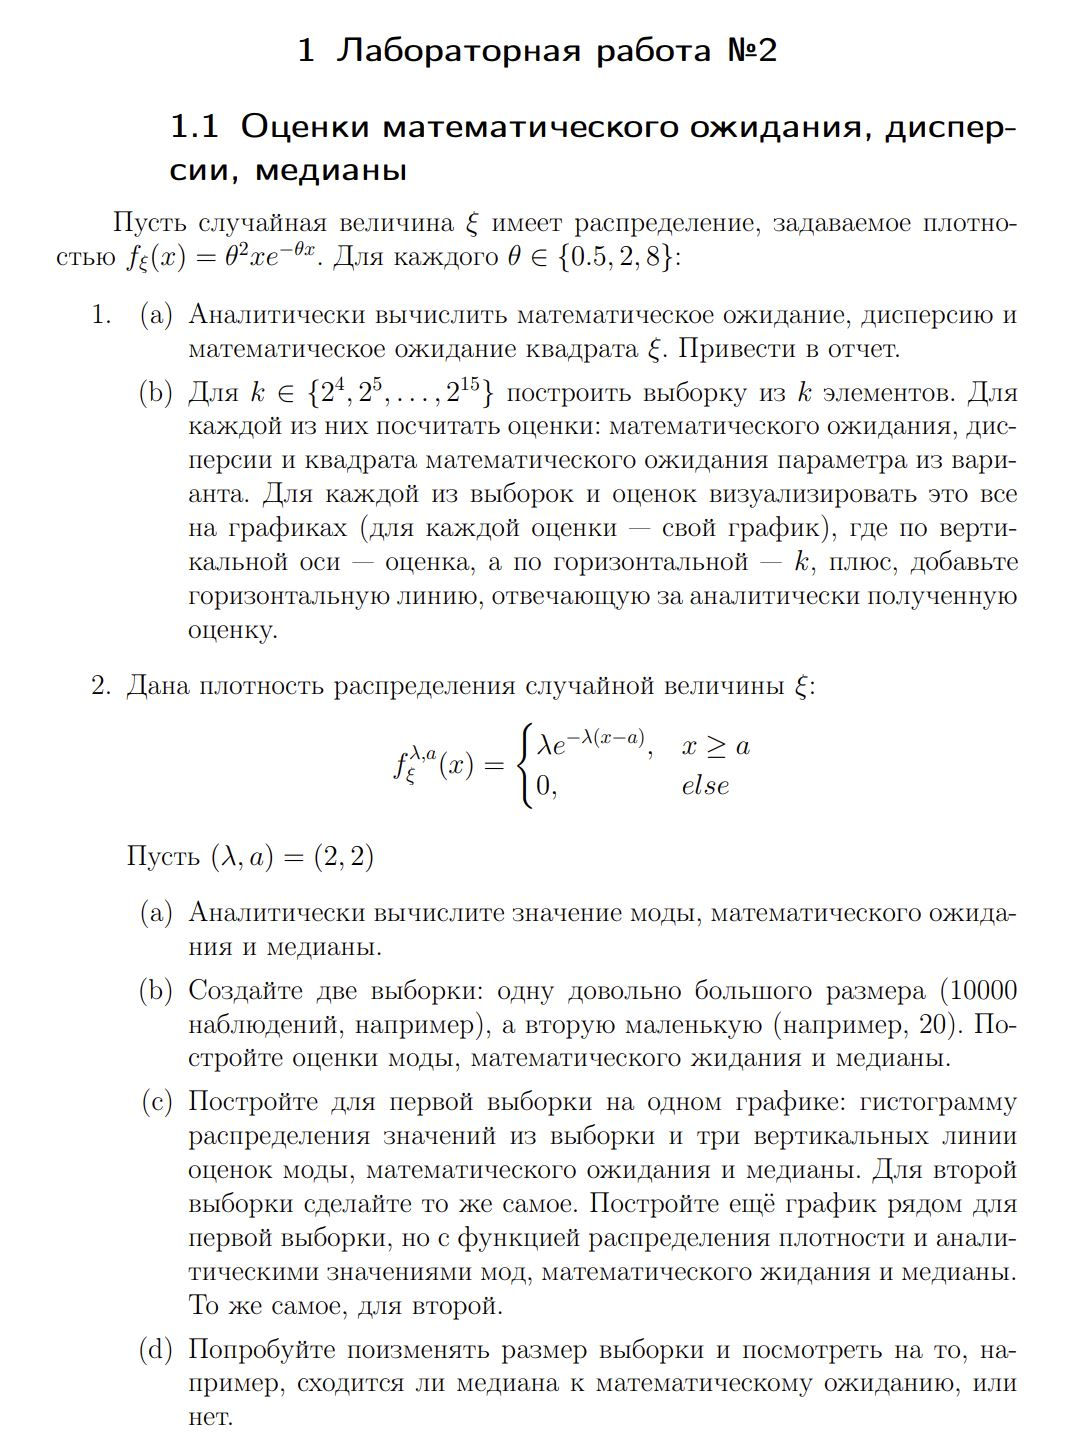

а) аналитически вычислить математическое ожидание, дисперсию и математическое ожидание квадрата ξ.
* Математическое ожидание:

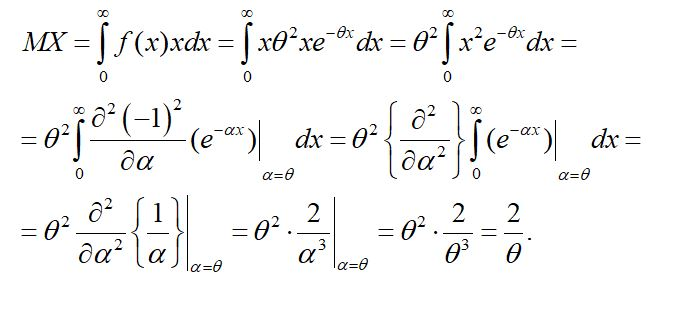



* Математическое ожидание квадрата ξ:
 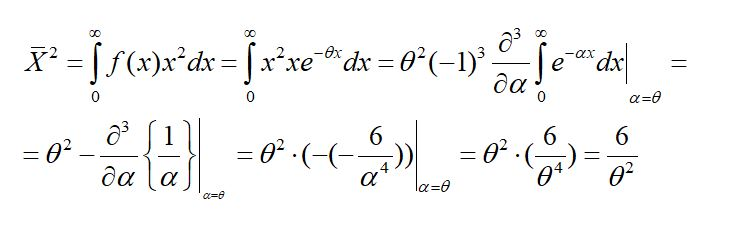

* Дисперсия:

 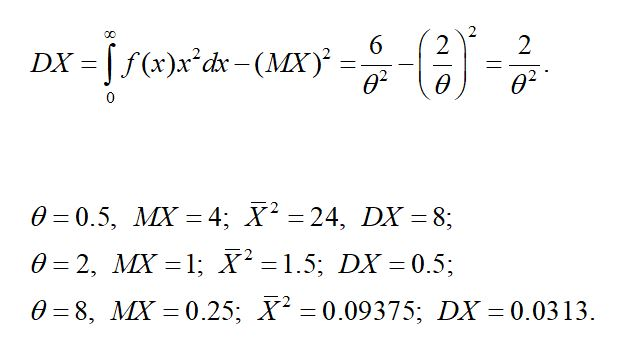



Б) для  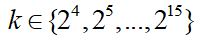 построить выборку из k элементов. Для каждой их них посчитать оценки: математического ожидания, дисперсии и квадрата математического ожидания параметра их варианта. Для каждой из выборок и оценок визуализировать это все на графиках (для каждой оценки свой график), где по вертикальной оси – оценка, а по горизонтальной – k, плюс, добавьте горизонтальную линию, отвечающую за аналитически полученную оценку.

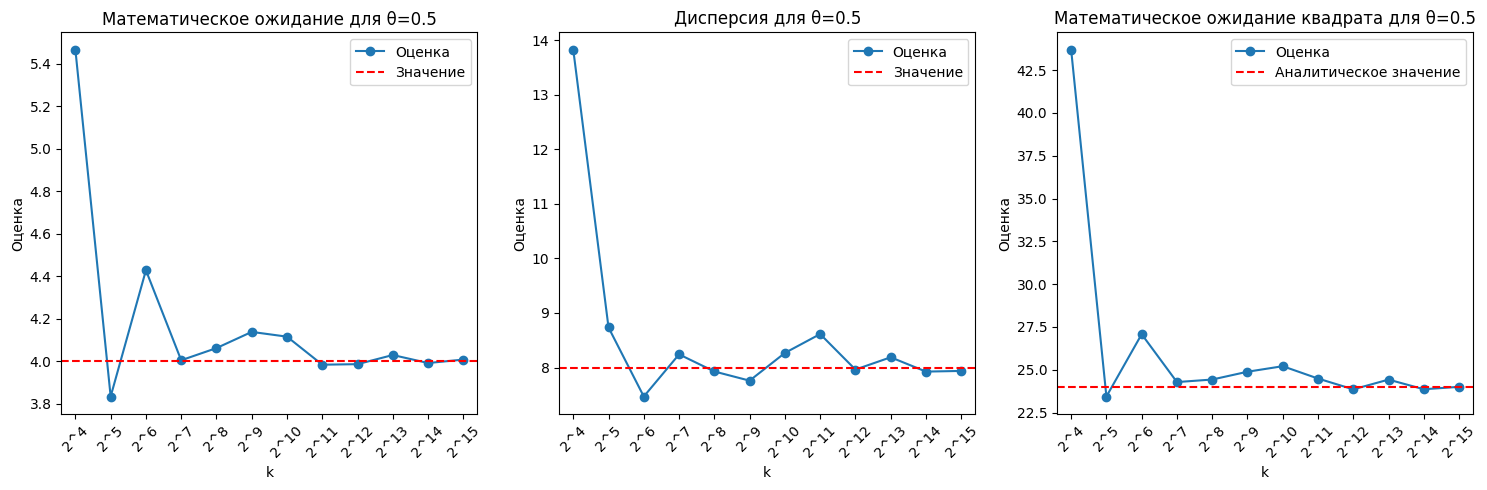

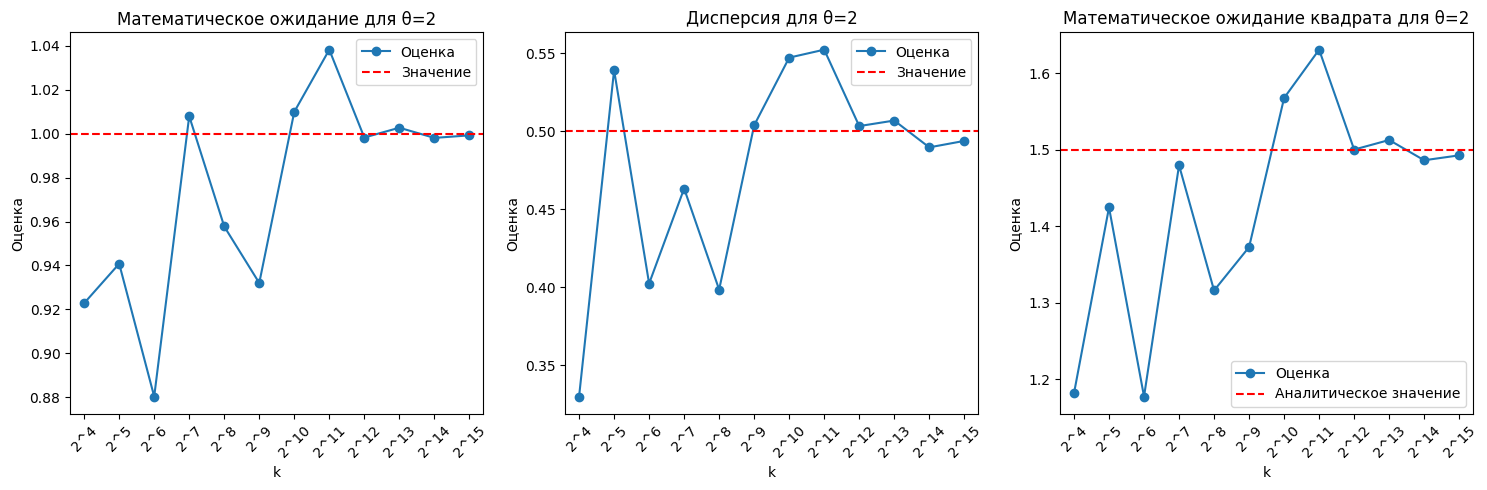

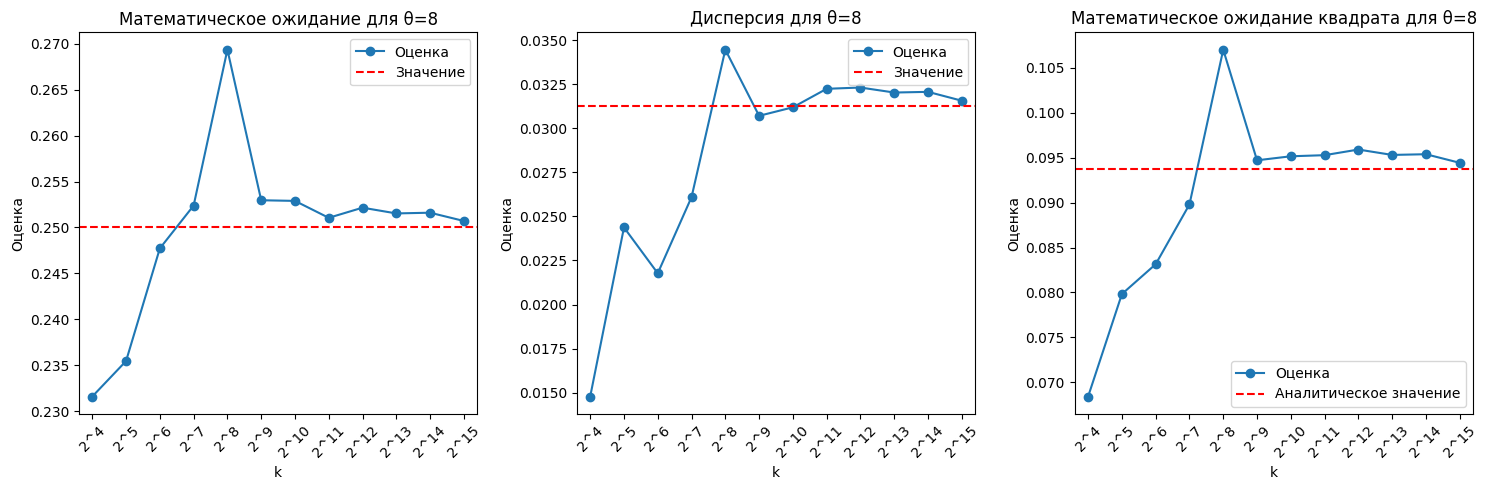

In [6]:
import numpy as np
import matplotlib.pyplot as plt

thetas = [0.5, 2, 8]
ks = [2**i for i in range(4, 16)]

def calculate_estimations(theta, k):
  samples = np.random.gamma(2, 1/theta, k)
  mean_estimate = np.mean(samples)
  variance_estimate = np.var(samples)
  squared_mean_estimate = np.mean(samples**2)

  return mean_estimate, variance_estimate, squared_mean_estimate

for theta in thetas:
  means = []
  variances = []
  squared_means = []

  for k in ks:
    mean_estimate, variance_estimate, squared_mean_estimate = calculate_estimations(theta, k)
    means.append(mean_estimate)
    variances.append(variance_estimate)
    squared_means.append(squared_mean_estimate)

  analytical_mean = 2 / theta
  analytical_variance = 2 / (theta**2)
  analytical_squared_mean = 6 / (theta**2)
  ticks = [i for i in range(5, len(ks) * 5 + 5, 5)]
  labels = [f'2^{i}' for i in range(4, 16)]

  plt.figure(figsize=(15, 5))
  plt.subplot(1, 3, 1)
  plt.plot(ticks, means, label='Оценка', marker='o')
  plt.axhline(y=analytical_mean, color='r', linestyle='--', label='Значение')
  plt.xticks(ticks=ticks, labels=labels, rotation=45)
  plt.xlim(ticks[0] - 2, ticks[-1] + 2)
  plt.xlabel('k')
  plt.ylabel('Оценка')
  plt.title(f'Математическое ожидание для θ={theta}')
  plt.legend()

  plt.subplot(1, 3, 2)
  plt.plot(ticks, variances, label='Оценка', marker='o')
  plt.axhline(y=analytical_variance, color='r', linestyle='--', label='Значение')
  plt.xticks(ticks=ticks, labels=labels, rotation=45)
  plt.xlim(ticks[0] - 2, ticks[-1] + 2)
  plt.xlabel('k')
  plt.ylabel('Оценка')
  plt.title(f'Дисперсия для θ={theta}')
  plt.legend()

  plt.subplot(1, 3, 3)
  plt.plot(ticks, squared_means, label='Оценка', marker='o')
  plt.axhline(y=analytical_squared_mean, color='r', linestyle='--', label='Аналитическое значение')
  plt.xticks(ticks=ticks, labels=labels, rotation=45)
  plt.xlim(ticks[0] - 2, ticks[-1] + 2)
  plt.xlabel('k')
  plt.ylabel('Оценка')
  plt.title(f'Математическое ожидание квадрата для θ={theta}')
  plt.legend()

  plt.tight_layout()
  plt.show()

2. Дана плотность распределения случайно величины ξ:
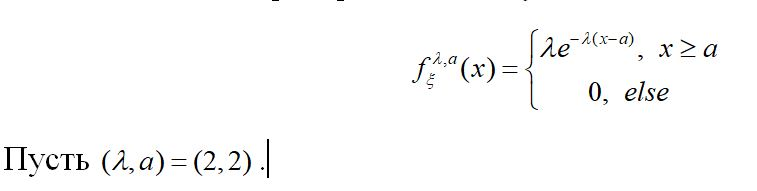


А) аналитически вычислите значение моды, математического ожидания и медианы


* Математическое ожидание

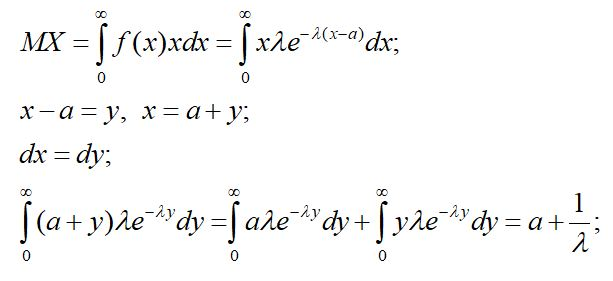


* Медиана:

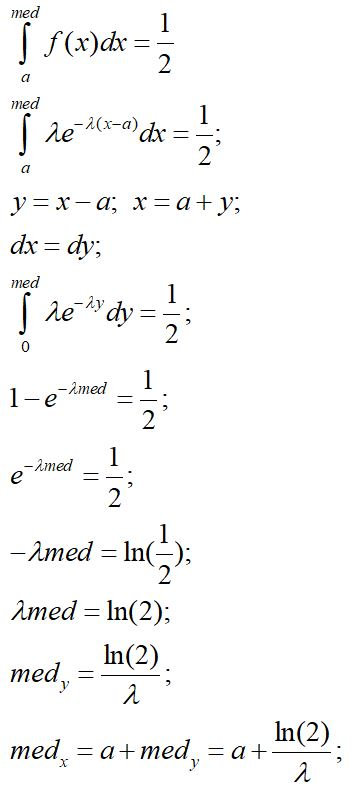

Б) создайте две выборки: одну довольно большого размера (10000 наблюдений, например), а вторую маленькую (например, 20). Постройте оценки моды, математического ожидания и медианы.
Нахождение случайно величины по указанному закону.

In [7]:
import numpy as np
from scipy import stats
import math

p_lambda = 2
alpha = 2

large_sample_size = 10000
small_sample_size = 20

large_sample = np.random.exponential(scale=1/p_lambda, size=large_sample_size) + alpha
small_sample = np.random.exponential(scale=1/p_lambda, size=small_sample_size) + alpha

mode = 2.0
mean = 2.5
median = (math.log(2)/math.log(math.e))/2 + 2

mode_large = stats.mode(large_sample)[0]
mean_large = np.mean(large_sample)
median_large = np.median(large_sample)

mode_small = stats.mode(small_sample)[0]
mean_small = np.mean(small_sample)
median_small = np.median(small_sample)

print("Результаты расчётов:")
print(f"Мода: {mode}")
print(f"Математическое ожидание: {mean}")
print(f"Медиана: {median}")

print("\nБольшая выборка:")
print(f"Мода: {mode_large}")
print(f"Математическое ожидание: {mean_large}")
print(f"Медиана: {median_large}")

print("\nМаленькая выборка:")
print(f"Мода: {mode_small}")
print(f"Математическое ожидание: {mean_small}")
print(f"Медиана: {median_small}")

Результаты расчётов:
Мода: 2.0
Математическое ожидание: 2.5
Медиана: 2.3465735902799727

Большая выборка:
Мода: 2.000083550708231
Математическое ожидание: 2.497140304452089
Медиана: 2.342555441810511

Маленькая выборка:
Мода: 2.0099036083539965
Математическое ожидание: 2.500834185796898
Медиана: 2.366424454394582


C) Постройте для первой выборки на одном графике: гистограмму
распределения значений из выборки и три вертикальных линии
оценок моды, математического ожидания и медианы. Для второй
выборки сделайте то же самое. Постройте ещё график рядом для
первой выборки, но с функцией распределения плотности и аналитическими значениями мод, математического жидания и медианы.
То же самое, для второй.

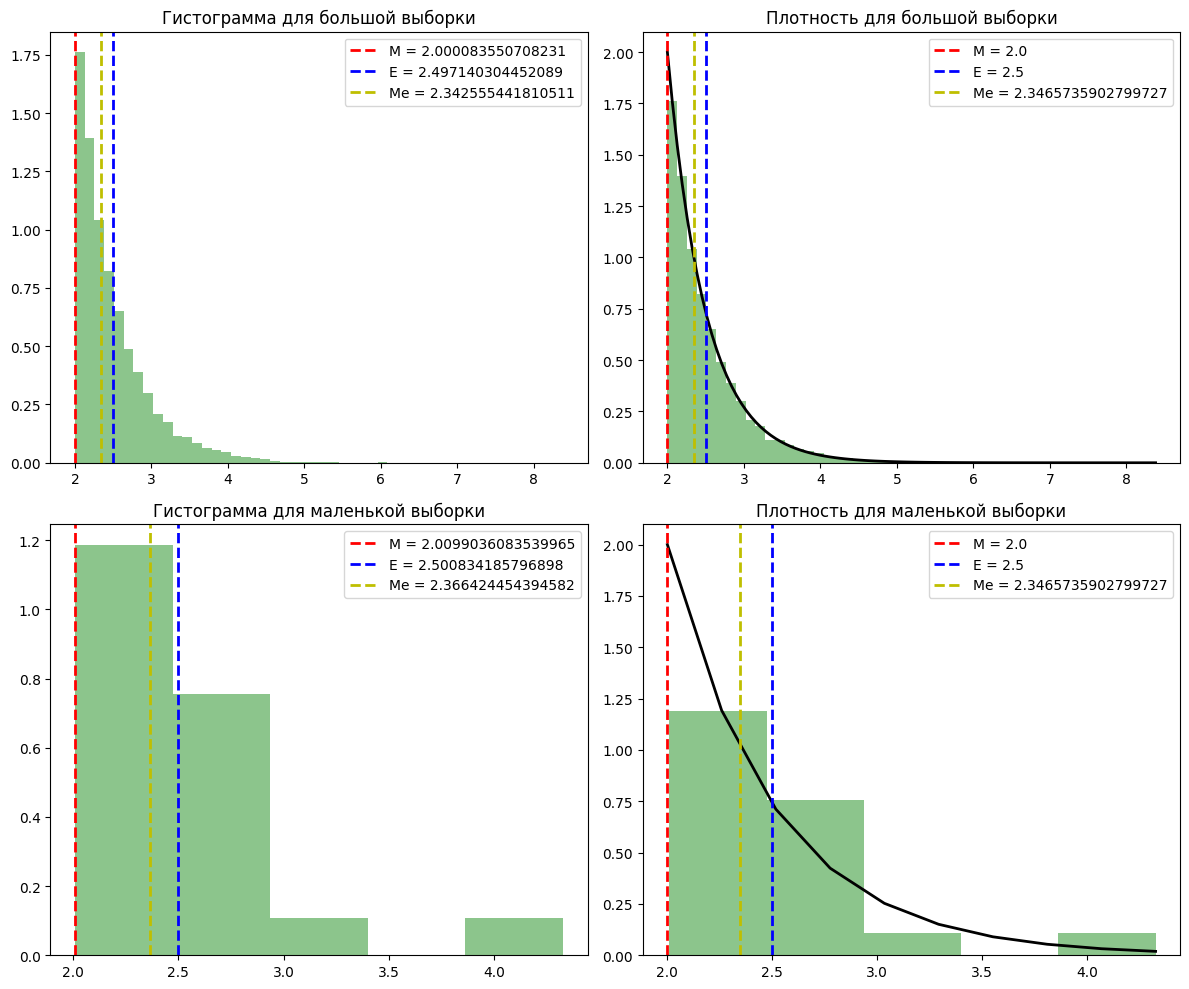

In [8]:
import matplotlib.pyplot as plt

def pdf(x):
  return p_lambda * np.exp(-p_lambda * (x - alpha))

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].hist(large_sample, bins=50, density=True, alpha=0.45, color='g')
axs[0, 0].axvline(mode_large, color='r', linestyle='dashed', linewidth=2, label=f'M = {mode_large}')
axs[0, 0].axvline(mean_large, color='b', linestyle='dashed', linewidth=2, label=f'E = {mean_large}')
axs[0, 0].axvline(median_large, color='y', linestyle='dashed', linewidth=2, label=f'Me = {median_large}')
axs[0, 0].set_title('Гистограмма для большой выборки')
axs[0, 0].legend()

x_large = np.linspace(2, np.max(large_sample), 100)
axs[0, 1].hist(large_sample, bins=50, density=True, alpha=0.45, color='g')
axs[0, 1].plot(x_large, pdf(x_large), 'k-', linewidth=2)
axs[0, 1].axvline(mode, color='r', linestyle='dashed', linewidth=2, label=f'M = {mode}')
axs[0, 1].axvline(mean, color='b', linestyle='dashed', linewidth=2, label=f'E = {mean}')
axs[0, 1].axvline(median, color='y', linestyle='dashed', linewidth=2, label=f'Me = {median}')
axs[0, 1].set_title('Плотность для большой выборки')
axs[0, 1].legend()

axs[1, 0].hist(small_sample, bins=5, density=True, alpha=0.45, color='g')
axs[1, 0].axvline(mode_small, color='r', linestyle='dashed', linewidth=2, label=f'M = {mode_small}')
axs[1, 0].axvline(mean_small, color='b', linestyle='dashed', linewidth=2, label=f'E = {mean_small}')
axs[1, 0].axvline(median_small, color='y', linestyle='dashed', linewidth=2, label=f'Me = {median_small}')
axs[1, 0].set_title('Гистограмма для маленькой выборки')
axs[1, 0].legend()

x_small = np.linspace(2, np.max(small_sample), 10)
axs[1, 1].hist(small_sample, bins=5, density=True, alpha=0.45, color='g')
axs[1, 1].plot(x_small, pdf(x_small), 'k-', linewidth=2)
axs[1, 1].axvline(mode, color='r', linestyle='dashed', linewidth=2, label=f'M = {mode}')
axs[1, 1].axvline(mean, color='b', linestyle='dashed', linewidth=2, label=f'E = {mean}')
axs[1, 1].axvline(median, color='y', linestyle='dashed', linewidth=2, label=f'Me = {median}')
axs[1, 1].set_title('Плотность для маленькой выборки')
axs[1, 1].legend()

plt.tight_layout()
plt.show()

(d) Попробуйте поизменять размер выборки и посмотреть на то, например, сходится ли медиана к математическому ожиданию, или
нет.

In [9]:
import numpy as np
from scipy import stats
import math

p_lambda = 2
alpha = 2

print("Результаты расчётов:")
print(f"Мода: {mode}")
print(f"Математическое ожидание: {mean}")
print(f"Медиана: {median}")

sample_sizes = [10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000, 500000, 1000000, 2000000, 5000000, 10000000]
modes = []
means = []
medians = []
for el in sample_sizes:
  new_sample = np.random.exponential(scale=1/p_lambda, size=el) + alpha

  new_mode = stats.mode(new_sample)[0]
  modes.append(new_mode)

  new_mean = np.mean(new_sample)
  means.append(new_mean)

  new_median = np.median(new_sample)
  medians.append(new_median)

  print(f"\nВыборка размером {el} элементов:")
  print(f"Мода: {new_mode}")
  print(f"Математическое ожидание: {new_mean}")
  print(f"Медиана: {new_median}")

Результаты расчётов:
Мода: 2.0
Математическое ожидание: 2.5
Медиана: 2.3465735902799727

Выборка размером 10 элементов:
Мода: 2.0304812540429147
Математическое ожидание: 2.4217408081534004
Медиана: 2.373879069418818

Выборка размером 20 элементов:
Мода: 2.019149991611791
Математическое ожидание: 2.438180501858039
Медиана: 2.14503825433429

Выборка размером 50 элементов:
Мода: 2.0020449546445804
Математическое ожидание: 2.488345404609355
Медиана: 2.3661441009439015

Выборка размером 100 элементов:
Мода: 2.0020522481843623
Математическое ожидание: 2.4688849965520014
Медиана: 2.3375826061304856

Выборка размером 200 элементов:
Мода: 2.0027388722496506
Математическое ожидание: 2.4858495294831986
Медиана: 2.3519249813056415

Выборка размером 500 элементов:
Мода: 2.002428912191896
Математическое ожидание: 2.4995300958830104
Медиана: 2.3668987440856

Выборка размером 1000 элементов:
Мода: 2.0000050828990155
Математическое ожидание: 2.4936685040980655
Медиана: 2.3448023949933328

Выборка разме

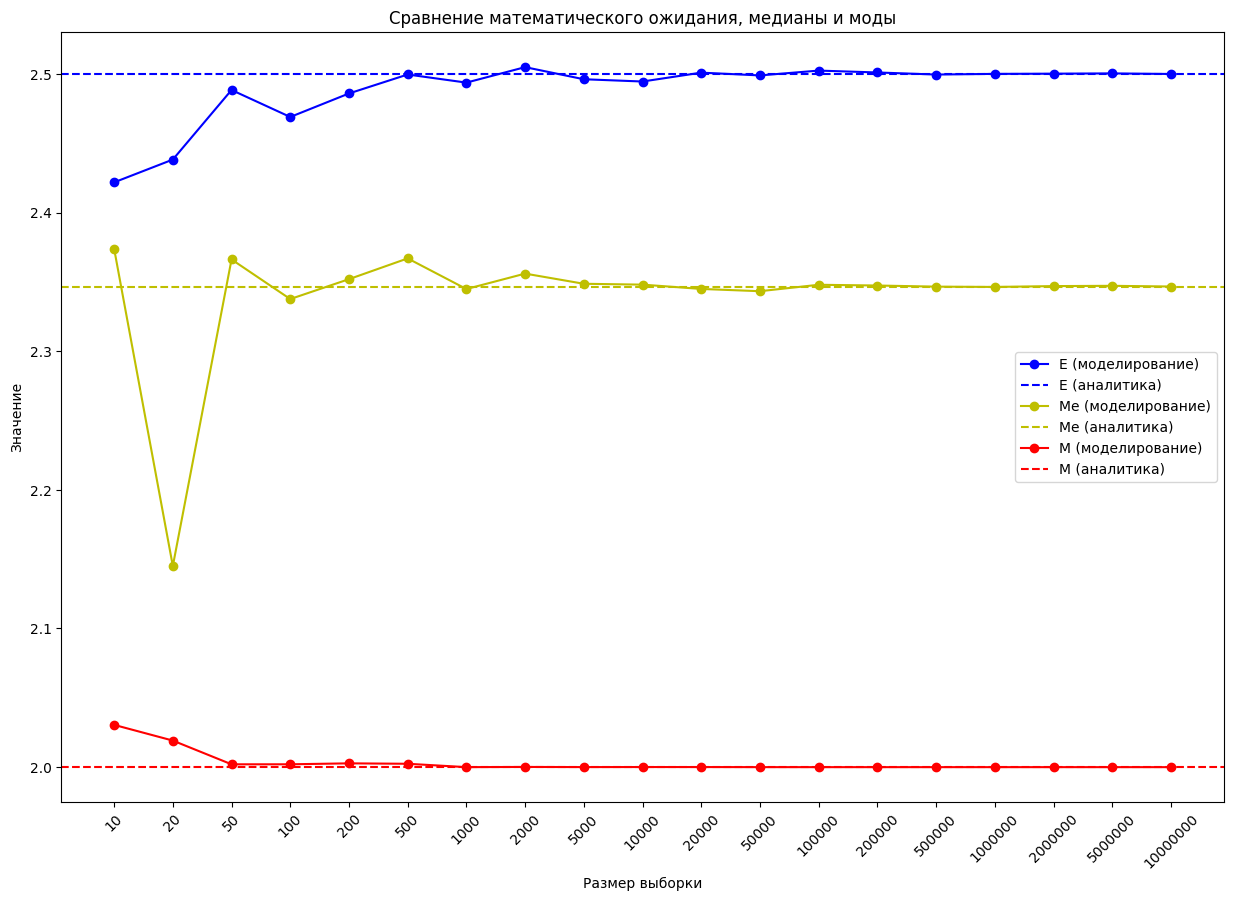

In [10]:
ticks = [i for i in range(5, len(sample_sizes) * 5 + 5, 5)]

plt.figure(figsize=(15, 10))
plt.plot(ticks, means, color='b', label='E (моделирование)', marker='o')
plt.axhline(y=mean, color='b', linestyle='--', label='E (аналитика)')
plt.plot(ticks, medians, color='y', label='Me (моделирование)', marker='o')
plt.axhline(y=median, color='y', linestyle='--', label='Me (аналитика)')
plt.plot(ticks, modes, color='r', label='M (моделирование)', marker='o')
plt.axhline(y=mode, color='r', linestyle='--', label='M (аналитика)')
plt.xticks(ticks=ticks, labels=sample_sizes, rotation=45)
plt.xlabel('Размер выборки')
plt.ylabel('Значение')
plt.title('Сравнение математического ожидания, медианы и моды')
plt.legend()
plt.show()

# ***Задание №3***

***Пусть совместное распределение двух случайных величин задано таблицей, где $\eta$ принимает все значения из $\mathbb{N}$. Вычислить корреляционую матрицу аналитически и приближенно (на основе моделирования).***\
$\begin{array}{|c|c|c|c|c|c|c|} \hline
\xi \backslash \eta & 1 & 2 & 3 & \ldots  \\ \hline
-1 & \frac{2}{5} \cdot \frac{1}{2^1} & \frac{2}{5} \cdot \frac{1}{2^2} & \frac{2}{5} \cdot \frac{1}{2^3} & \ldots  \\ \hline
0 & \frac{1}{5} \cdot \frac{1}{2^1} & \frac{1}{5} \cdot \frac{1}{2^2} & \frac{1}{5} \cdot \frac{1}{2^3} & \ldots \\ \hline
1 & \frac{2}{5} \cdot \frac{1}{2^1} & \frac{2}{5} \cdot \frac{1}{2^2} & \frac{2}{5} \cdot \frac{1}{2^3} & \ldots \\ \hline
\end{array}$

***$\displaystyle{\sum_{k=0}^{n} x^k = \frac{1}{1-x}}$***\
\
***$\displaystyle{\left (\sum_{k=0}^{n} x^k \right)' = \left (\frac{1}{1-x}\right)'}$***\
***$\displaystyle{\left(\frac{1}{1-x} \right)' = -\frac{(1-x)'}{(1-x)^2} = -\frac{-1}{(1-x)^2} = \frac{1}{(1-x)^2}}$***\
***$\displaystyle{\sum_{k=1}^{n} k \cdot x^{k-1} = \frac{1}{(1-x)^2}}$***\
***$\displaystyle{\sum_{k=1}^{n} x \cdot k \cdot x^{k-1} = \frac{x}{(1-x)^2}}$***\
***$\displaystyle{\sum_{k=1}^{n} k \cdot x^{k} = \frac{x}{(1-x)^2}}$***\
\
***$\displaystyle{\left(\sum_{k=1}^{n} k \cdot x^k \right)' = \left (\frac{x}{(1-x)^2}\right)'}$***\
***$\displaystyle{\left(\frac{x}{(1-x)^2} \right)' = \frac{x' \cdot (1-x)^2 - x \cdot \left((1-x)^2\right)'}{\left((1-x)^2\right)^2} = \frac{(1-x)^2 -2 \cdot x \cdot (1-x) \cdot (1-x)'}{(1-x)^4} = \frac{(1-x)^2 + 2 \cdot x \cdot (1-x)}{(1-x)^4} = \frac{(1-x) \cdot (1-x + 2 \cdot x)}{(1-x)^4} = \frac{x+1}{(1-x)^3}}$***\
***$\displaystyle{\sum_{k=1}^{n} k^2 \cdot x^{k-1} = \frac{x+1}{(1-x)^3}}$***\
***$\displaystyle{\sum_{k=1}^{n} x \cdot k^2 \cdot x^{k-1} = \frac{x \cdot (x+1)}{(1-x)^3}}$***\
***$\displaystyle{\sum_{k=1}^{n} k^2 \cdot x^{k} = \frac{x \cdot (x+1)}{(1-x)^3}}$***

***$\displaystyle{P(\xi = -1) = \frac{2}{5} \cdot \frac{1}{2^1} + \frac{2}{5} \cdot \frac{1}{2^2} + \frac{2}{5} \cdot \frac{1}{2^3} + ... + \frac{2}{5} \cdot \frac{1}{2^n} = \sum_{i=1}^{n} \frac{2}{5} \cdot \frac{1}{2^i} = \frac{2}{5} \cdot \sum_{i=1}^{n} \frac{1}{2^i} = \frac{2}{5} \cdot \sum_{i=1}^{n} (\frac{1}{2})^i = \frac{2}{5} \cdot \frac{b_1}{1 - q} = \frac{2}{5} \cdot \frac{\frac{1}{2}}{1 - \frac{1}{2}} = \frac{2}{5} \cdot 1 = \frac{2}{5}}$***\
***$\displaystyle{P(\xi = 0) = \frac{1}{5} \cdot \frac{1}{2^1} + \frac{1}{5} \cdot \frac{1}{2^2} + \frac{1}{5} \cdot \frac{1}{2^3} + ... + \frac{1}{5} \cdot \frac{1}{2^n} = \sum_{i=1}^{n} \frac{1}{5} \cdot \frac{1}{2^i} = \frac{1}{5} \cdot \sum_{i=1}^{n} \frac{1}{2^i} = \frac{1}{5} \cdot \sum_{i=1}^{n} (\frac{1}{2})^i = \frac{1}{5} \cdot \frac{b_1}{1 - q} = \frac{1}{5} \cdot \frac{\frac{1}{2}}{1 - \frac{1}{2}} = \frac{1}{5} \cdot 1 = \frac{1}{5}}$***
***$\displaystyle{P(\xi = 1) = \frac{2}{5} \cdot \frac{1}{2^1} + \frac{2}{5} \cdot \frac{1}{2^2} + \frac{2}{5} \cdot \frac{1}{2^3} + ... + \frac{2}{5} \cdot \frac{1}{2^n} = \sum_{i=1}^{n} \frac{2}{5} \cdot \frac{1}{2^i} = \frac{2}{5} \cdot \sum_{i=1}^{n} \frac{1}{2^i} = \frac{2}{5} \cdot \sum_{i=1}^{n} (\frac{1}{2})^i = \frac{2}{5} \cdot \frac{b_1}{1 - q} = \frac{2}{5} \cdot \frac{\frac{1}{2}}{1 - \frac{1}{2}} = \frac{2}{5} \cdot 1 = \frac{2}{5}}$***\
\
***$\displaystyle{P(\eta = k) = P(\eta = k, \xi = -1) + P(\eta = k, \xi = 0) + P(\eta = k, \xi = 1) = \frac{2}{5} \cdot \frac{1}{2^k} + \frac{1}{5} \cdot \frac{1}{2^k} + \frac{2}{5} \cdot \frac{1}{2^k} = \frac{1}{2^k} \cdot (\frac{2}{5} + \frac{1}{5} + \frac{2}{5}) = \frac{1}{2^k} \cdot \frac{5}{5} = \frac{1}{2^k}}$***\
\
***$\displaystyle{E(\xi) = -1 \cdot P(\xi = -1) + 0 \cdot P(\xi = 0) + 1 \cdot P(\xi = 1) = -1 \cdot \frac{2}{5} + 0 \cdot \frac{1}{5} + 1 \cdot \frac{2}{5} = -\frac{2}{5} + \frac{2}{5} = 0}$***\
***$\displaystyle{E(\eta) = \sum_{i=1}^{n} k \cdot P(\eta = k) = \sum_{i=1}^{n} k \cdot \frac{1}{2^k} = \frac{b_1}{(1 - q)^2} = \frac{\frac{1}{2}}{(1 - \frac{1}{2})^2} = \frac{\frac{1}{2}}{\frac{1}{4}} = 2}$***\
\
***$\displaystyle{E(\xi^2) = (-1)^2 \cdot P(\xi = -1) + 0^2 \cdot P(\xi = 0) + 1^2 \cdot P(\xi = 1) = 1 \cdot \frac{2}{5} + 0 \cdot \frac{1}{5} + 1 \cdot \frac{2}{5} = \frac{2}{5} + \frac{2}{5} = \frac{4}{5}}$***\
***$\displaystyle{E(\eta^2) = \sum_{i=1}^{n} k^2 \cdot P(\eta = k) = \sum_{i=1}^{n} k^2 \cdot \frac{1}{2^k} = \frac{b_1 \cdot (1+b_1)}{(1 - q)^3} = \frac{\frac{1}{2} \cdot \frac{3}{2}}{(1 - \frac{1}{2})^3} = \frac{\frac{3}{4}}{\frac{1}{8}} = 6}$***\
\
***$\displaystyle{D(\xi) = E(\xi^2) - E^2(\xi)} = \frac{4}{5} - 0^2 = \frac{4}{5}$***\
***$\displaystyle{D(\eta) = E(\eta^2) - E^2(\eta)} = 6 - 2^2 = 6 - 4 = 2$***\
\
***$\displaystyle{cov(\xi, \eta) = E(\xi, \eta) - E(\xi) \cdot E(\eta) = E(\xi, \eta) - 0 \cdot 2 = E(\xi, \eta)}$***\
***$\displaystyle{E(\xi, \eta) = \sum_{i} \sum_{j} \xi_i \cdot \eta_j \cdot P(\xi = \xi_i, \eta = \eta_j)}$***\
***$\displaystyle{P(\xi = -1, \eta = k) = \frac{2}{5} \cdot \frac{1}{2^k}}$***\
***$\displaystyle{P(\xi = 0, \eta = k) = \frac{1}{5} \cdot \frac{1}{2^k}}$***\
***$\displaystyle{P(\xi = 1, \eta = k) = \frac{2}{5} \cdot \frac{1}{2^k}}$***\
***$\displaystyle{E(\xi, \eta) = \sum_{k=0}^{n} -1 \cdot k \cdot P(\xi = -1, \eta = k) + \sum_{k=0}^{n} 0 \cdot k \cdot P(\xi = -0, \eta = k) + \sum_{k=0}^{n} 1 \cdot k \cdot P(\xi = 1, \eta = k) = \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;= \sum_{k=0}^{n} -1 \cdot k \cdot P(\xi = -1, \eta = k) + \sum_{k=0}^{n} 1 \cdot k \cdot P(\xi = 1, \eta = k) = \sum_{k=0}^{n} -1 \cdot k \cdot P(\xi = -1, \eta = k) + 1 \cdot k \cdot P(\xi = 1, \eta = k) =\;\;\;\;=\sum_{k=0}^{n} -1 \cdot k \cdot \frac{2}{5} \cdot \frac{1}{2^k} + 1 \cdot k \cdot \frac{2}{5} \cdot \frac{1}{2^k} = 0}$***\
***$\displaystyle{cov(\xi, \eta) = E(\xi, \eta) = 0}$***\
\
 ***Ковариационная матрица:*** $\begin{pmatrix}
D(\xi) & cov(\xi,\eta)\\
cov(\xi,\eta) & D(\eta)
\end{pmatrix} = \begin{pmatrix}
0.8 & 0\\
0 & 2
\end{pmatrix}$\
\
$\rho(\xi, \eta) = \frac{cov(\xi, \eta)}{\sigma(\xi) \cdot \sigma(\eta)} = \frac{cov(\xi, \eta)}{\sqrt{D(\xi)} \cdot \sqrt{D(\eta)}} = \frac{0}{\sqrt{0.8} \cdot \sqrt{2}} = 0$\
\
 ***Корреляционная матрица:*** $\begin{pmatrix}
1 & \rho(\xi, \eta)\\
\rho(\xi, \eta) & 1
\end{pmatrix} = \begin{pmatrix}
1 & 0\\
0 & 1
\end{pmatrix}$

In [11]:
import numpy as np
import pandas as pd

np.set_printoptions(suppress=True)

N = 1000000
max_k = 200000

xi_values = [-1, 0, 1]
xi_probs = [2/5, 1/5, 2/5]
xi_samples = np.random.choice(xi_values, size=N, p=xi_probs)

eta_probs = np.array([1 / (2 ** k) for k in range(1, max_k + 1)])
eta_probs /= eta_probs.sum()

eta_samples = np.random.choice(range(1, max_k + 1), size=N, p=eta_probs)

data = pd.DataFrame({'xi': xi_samples, 'eta': eta_samples})

covariance_matrix = np.cov(data['xi'], data['eta'], rowvar=False)

print("Ковариационная матрица:")
print(covariance_matrix)

correlation_matrix = np.corrcoef(data['xi'], data['eta'])

print("\nКорреляционная матрица:")
print(correlation_matrix)

Ковариационная матрица:
[[ 0.80010564 -0.00153808]
 [-0.00153808  1.99610996]]

Корреляционная матрица:
[[ 1.         -0.00121706]
 [-0.00121706  1.        ]]
